In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimensionement ressort

[Traité de construction horlogère](https://books.google.fr/books?id=EPxUNlKp1JUC&lpg=PA38&dq=ressort%20barillet%20formule&hl=fr&pg=PA31#v=onepage&q&f=false)

formule 2.20 page 31:

$$
M = E\,\frac{h\,e^3}{12\,L}\,\alpha
$$

où  
* $M$ est le moment ($N.m$)
* $\alpha$ est la variation d'angle (en radian)
* $E$ est le module de Young ($N/m^2$)
* $L$ est la longueur du ressort
* $h$ est la largeur de lame
* $e$ est l'épaisseur de la lame

et un peu plus loin, on trouve l'énergie maximal stockée dans le ressort $U_{max}$:
$$
U_{max} = \frac{1}{2} E \frac{h\,e^3}{12\,L}\,\alpha_{max}^2
$$

On trouve d'autre précision [ici](http://www.springsandthings.com/pdf/spiral-torsion-springs.pdf):

La contrainte maximale est typiquement de ~1200 MPa, et est donnée par la formule:
$$
\sigma_{max} = \frac{6}{h e^2} M_{max} = \frac{E\,e}{2\, L} \alpha_{max}
$$
(aussi la formule 2.22)

Une formule permet d'estimer la taille du ressort en fonction de sa longueur:
$$
D = \frac{2\,L}{\pi \,\left( \frac{\sqrt{A^2 - 1.27Le} - A}{2e} - \frac{\alpha}{2\pi} \right) } - A
$$

On peut en déduire le meilleurs compromis entre l'épaisseur du ressort et sa longueur:

pour la limite en contrainte :
$$
e_{lim} = \frac{\sigma_{max}}{E}\frac{2L}{\alpha}
$$

pour la limite en masse ($m_{max}$), $\rho$ est la densité de l'acier:
$$
e_{lim} = \frac{m_{max}}{\rho \, L\, h}
$$

donc 
$$
\frac{m_{max}}{\rho \, L_{opti}\, h}  = \frac{\sigma_{max}}{\alpha}\frac{2L_{opti}}{E}
$$

$$
L_{opti} =  \sqrt{ \frac{\alpha}{2} \, \frac{m_{max}}{\rho \, h} \frac{E}{\sigma_{max}} }
$$

et l'expression de l'épaisseur optimal devient:
$$
e_{opti} = \sqrt{ \frac{2}{\alpha} \, \frac{m_{max}}{\rho \, h} \frac{\sigma_{max}}{E} }
$$

L'energie stockée devient:
$$
U_{opti} = \frac{1}{6} \frac{\sigma_{max}^2}{E}\,\frac{m_{max}}{\rho}
$$

### Valeurs raisonables:

In [435]:
# Energie cinétique du cycliste :
deltaV = 15 *1e3/3600 # m/s
masse = 90 # kg

Ecinetique = 0.5*masse *deltaV**2
print( 'Energie cinétique: %.0f Joule' % Ecinetique )

Energie cinétique: 781 Joule


entre 100 et 800 Joule...

Le cyliste est quand même sensé pédaler aussi

In [452]:
Ntour = 0.75# nombre de tour possible
alpha_max = 2*np.pi* Ntour  
E = 220e9 # Pa  - acier à ressort (wikipédia)

In [453]:
rayon = 69e-2 / 2 # m, rayon d'une roue
distance_assistance = rayon*alpha_max
print( "distance de l'assistance: %.1f m" % distance_assistance )

distance de l'assistance: 1.6 m


Typiquement la distance de démarrage... la moitié d'une intersection...

In [454]:
e = 1e-3 # m
h = 10e-3 # m
L = 4 # m

In [455]:
Umax = 0.5*E*h* e**3 /12/L * alpha_max**2  # J

print( 'Energie potentiel max: %.0f Joule' % Umax )

Energie potentiel max: 1 Joule


In [456]:
rho = 7400 # kg/m3
V = e*h*L  # colume du ressort
Mressort = rho*V

print( 'Masse du ressort: %.0f grammes' % (Mressort*1000) )

Masse du ressort: 296 grammes


In [457]:
sigma_max = alpha_max / 2 * e *E /L 

print( 'Contrainte max du ressort: %.0f MPa (vs 1200 MPa)' % (sigma_max*1e-6) )

Contrainte max du ressort: 130 MPa (vs 1200 MPa)


In [458]:
A = 2e-2 # diamètre intérieure
D = 2*L/( ( np.sqrt(A**2 + 1.27*L*e)-A )/2/e - alpha_max/2/np.pi )/np.pi - A

In [459]:
print('diamètre extérieure: %.1f cm ' % (D*100) )

diamètre extérieure: 7.7 cm 


In [460]:
Umax_map = lambda e, L:0.5*E*h* e**3 /12/L * alpha_max**2  # J


sigma_limit = 1200*1e6 # Pa
e_max_sigmaLimit = lambda L: sigma_limit*2*L / alpha_max /E


e_max_masseLimit = lambda L, masse_limit: masse_limit/h/L/rho

delta_V = lambda deltaE : np.sqrt( 2/masse* deltaE  )*3600/1e3  # km/h

In [461]:
masse_limit = 1 # kg
sigma_limit = 1200*1e6 # Pa

U_opti = 1/6 * sigma_limit**2 / E * masse_limit/ rho
e_opti = np.sqrt( masse_limit/rho/h * 2/alpha_max * sigma_limit/E )
L_opti = np.sqrt( masse_limit/rho/h * alpha_max/2 * E / sigma_limit )

In [462]:
print( U_opti, delta_V(U_opti) )
print( e_opti*1e3 )
print( L )

147.4201474201474 6.51590380968
5.59316787676
4


In [463]:
Umax_map( e_opti, L_opti )

147.42014742014746

In [464]:
L_span = np.linspace( 0.5, 10, 44 )
e_span = 1e-3* np.linspace( 0.1, 5, 56 )

Lxy, exy = np.meshgrid(L_span, e_span)
Umax_xy = Umax_map( exy, Lxy  )

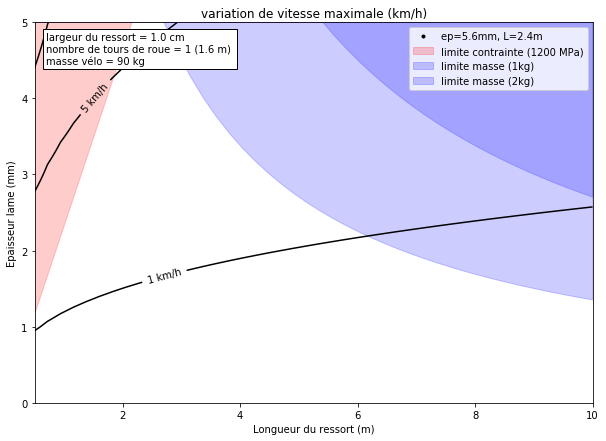

In [465]:
plt.figure(figsize=(10, 7))

# en Joule
#CS = plt.contour( L_span, 1e3*e_span, Umax_xy, colors='k', levels=[50, 100, 200, 400, 800, 1000] )
#plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f J')
#plt.title('Energie maximale stockée (Joule)');

## en km/h
CS = plt.contour( L_span, 1e3*e_span, delta_V(Umax_xy), colors='k', levels=[1, 5, 10, 15, 20] )
plt.clabel(CS, inline=1, fontsize=10, fmt='%.0f km/h')
plt.title('variation de vitesse maximale (km/h)');

plt.xlabel('Longueur du ressort (m)')
plt.ylabel('Epaisseur lame (mm)')


e_upper = np.max(e_span)*1e3
plt.fill_between( L_span, 1e3*e_max_sigmaLimit(L_span), e_upper*np.ones_like(L_span), alpha=0.2, color='r', label='limite contrainte (1200 MPa)' )
plt.fill_between( L_span, 1e3*e_max_masseLimit(L_span, 1),  e_upper*np.ones_like(L_span), alpha=0.2, color='b', label='limite masse (1kg)' )
plt.fill_between( L_span, 1e3*e_max_masseLimit(L_span, 2),  e_upper*np.ones_like(L_span), alpha=0.2, color='b', label='limite masse (2kg)' )

plt.plot( L_opti, e_opti*1e3, '.k', label='ep=%.1fmm, L=%.1fm'%((e_opti*1e3), L_opti)  )

plt.legend();
plt.ylim( [0, e_upper ] );

mytext = 'largeur du ressort = %.1f cm \n' % (1e2*h)
mytext += 'nombre de tours de roue = %.0f (%.1f m) \n' % (Ntour, distance_assistance)
mytext += 'masse vélo = %.0f kg ' % (masse)

ax = plt.gca()
ax.text(0.02, 0.89, mytext,transform=ax.transAxes, bbox=dict(facecolor='w',edgecolor='black',boxstyle='square'))



In [471]:
# Rubber
rho = 1
E = 0.1e9
sigma_max = 16e6

(sigma_max)**2/E/rho

2560000.0

In [472]:
# Acier
rho = 7
E = 220e9
sigma_max = 1200e6

(sigma_max)**2/E/rho

935064.9350649351

In [473]:
# Carbon fiber
rho = 1.75
E = 400e9
sigma_max = 1600e6

(sigma_max)**2/E/rho

3657142.8571428573

In [474]:
# Kevlar
rho = 1.44
E = 100e9
sigma_max = 3757e6

(sigma_max)**2/E/rho


98021173.61111112